# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
from scipy import math
import requests
import datetime
from datetime import datetime


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
import statsmodels.api as sm

# Custom
import wrangle

# plotting defaults
plt.rc('figure', figsize=(15, 8))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = wrangle.wrangle_superstore()
df.head(3)

Saving to .csv


,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,sales,quantity,discount,profit,category_id,region_id,product name,category,sub_category,region_name
order_date,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,11.784,3.0,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,3.540,2.0,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,272.736,3.0,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central


In [3]:
# Verify everything looks good
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1734 non-null   object 
 1   ship_date        1734 non-null   object 
 2   shipping_method  1734 non-null   object 
 3   customer_id      1734 non-null   object 
 4   segment          1734 non-null   object 
 5   country          1734 non-null   object 
 6   city             1734 non-null   object 
 7   state            1734 non-null   object 
 8   zip_code         1734 non-null   float64
 9   product id       1734 non-null   object 
 10  sales            1734 non-null   float64
 11  quantity         1734 non-null   float64
 12  discount         1734 non-null   float64
 13  profit           1734 non-null   float64
 14  category_id      1734 non-null   int64  
 15  region_id        1734 non-null   int64  
 16  product name     1734 non-null   object 
 

In [4]:
# Train, Validate, Test variables if needed
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((712, 20), (526, 20), (496, 20))

## Look for a trends in sales for different products and see if any are becoming more popular

<AxesSubplot:xlabel='order_date'>

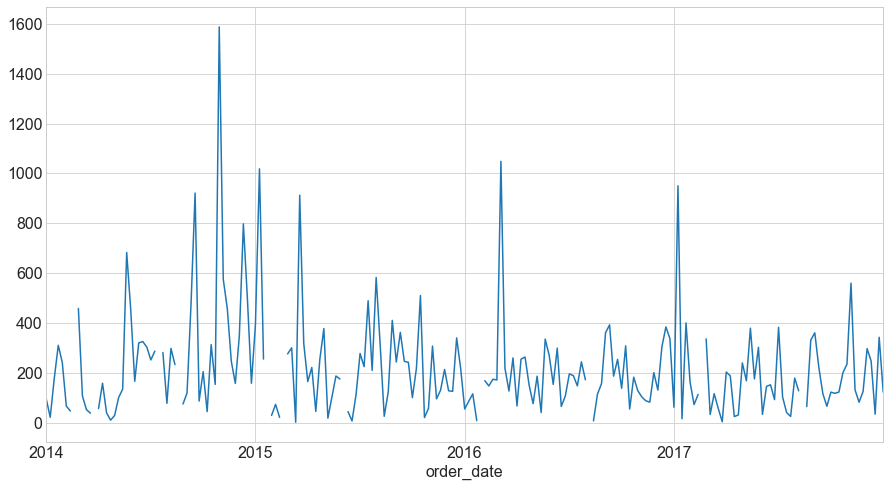

In [5]:
df.resample('w').sales.mean().plot()

<AxesSubplot:title={'center':'Month-to-Month Change in Sales'}, xlabel='Date By Month'>

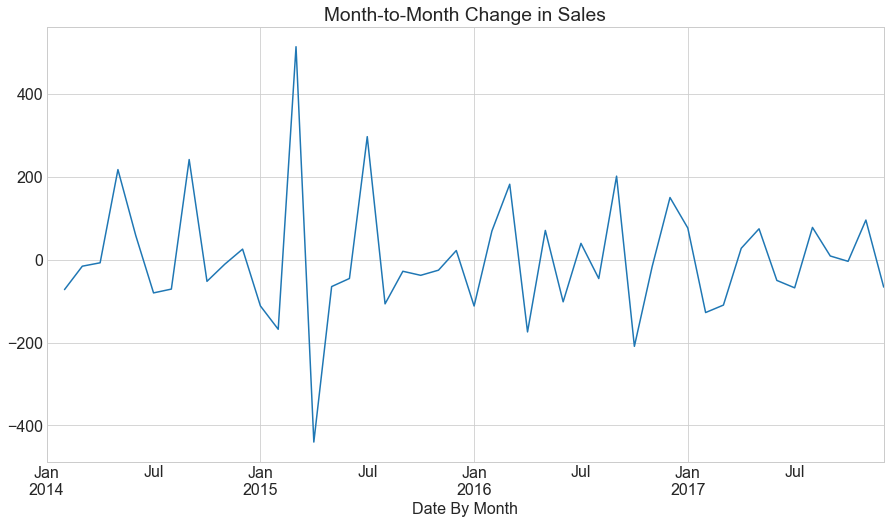

In [6]:
# Difference in sales
df.resample('M').sales.mean().diff().plot(title='Month-to-Month Change in Sales', xlabel='Date By Month')

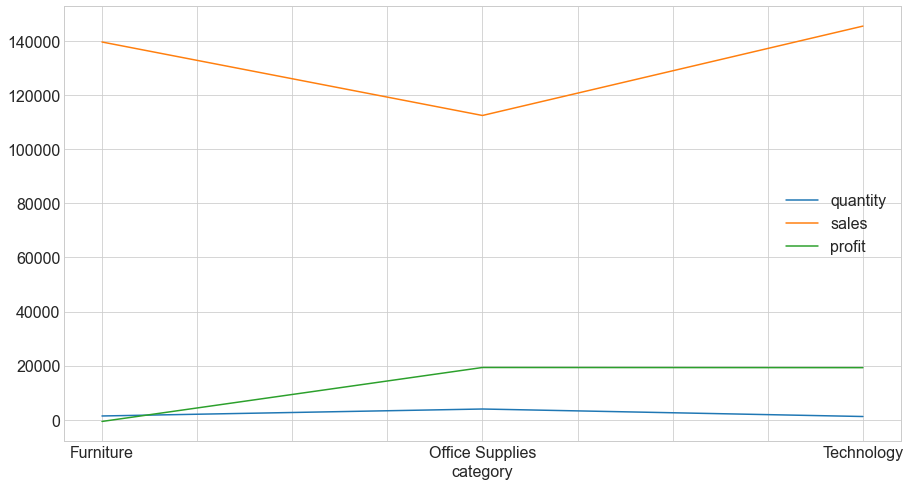

In [7]:
df.groupby('category')['quantity'].sum().plot()
df.groupby('category')['sales'].sum().plot()
df.groupby('category')['profit'].sum().plot()
plt.legend()
plt.show()

## Possible Variables to explore

In [8]:
tech = df[df['category'] == 'Technology']
furniture = df[df['category'] == 'Furniture']
office = df[df['category'] == 'Office Supplies']

num_cols = ['profit', 'sales', 'quantity', 'discount']

In [9]:
num_df = df[num_cols]
num_df.head()

,profit,sales,quantity,discount
order_date,,,,
2014-01-04,4.2717,11.784,3.0,0.2
2014-01-04,-5.4870,3.540,2.0,0.8
2014-01-04,-64.7748,272.736,3.0,0.2
2014-01-09,9.7500,31.200,3.0,0.2
2014-01-09,1.1680,9.344,2.0,0.2


<AxesSubplot:xlabel='order_date'>

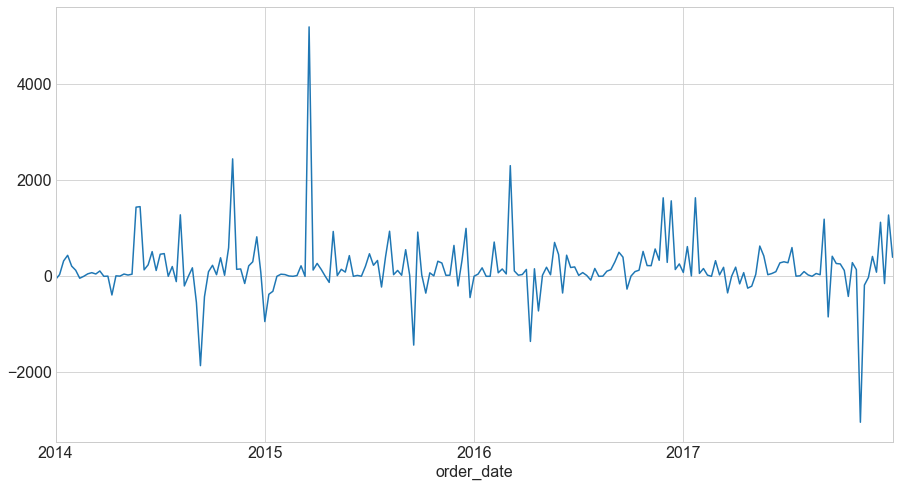

In [10]:
df.resample('W')['profit'].sum().plot()

<AxesSubplot:xlabel='order_date'>

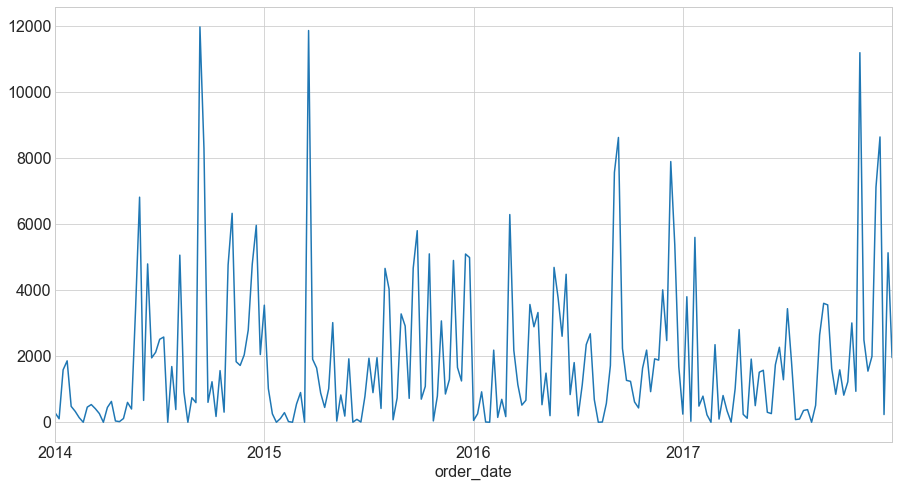

In [11]:
df.resample('W')['sales'].sum().plot()

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

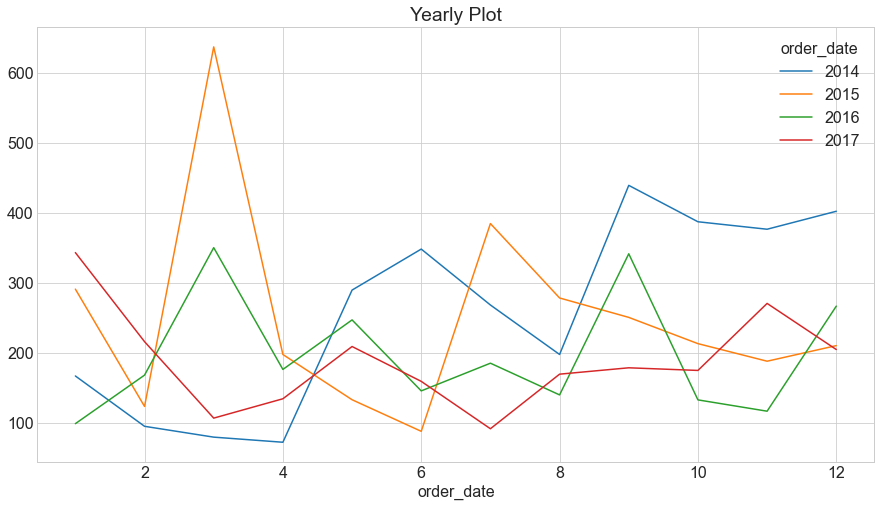

In [12]:
# Sales
df.groupby([df.index.year, df.index.month])['sales'].mean().unstack(0).plot(title='Yearly Plot')

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

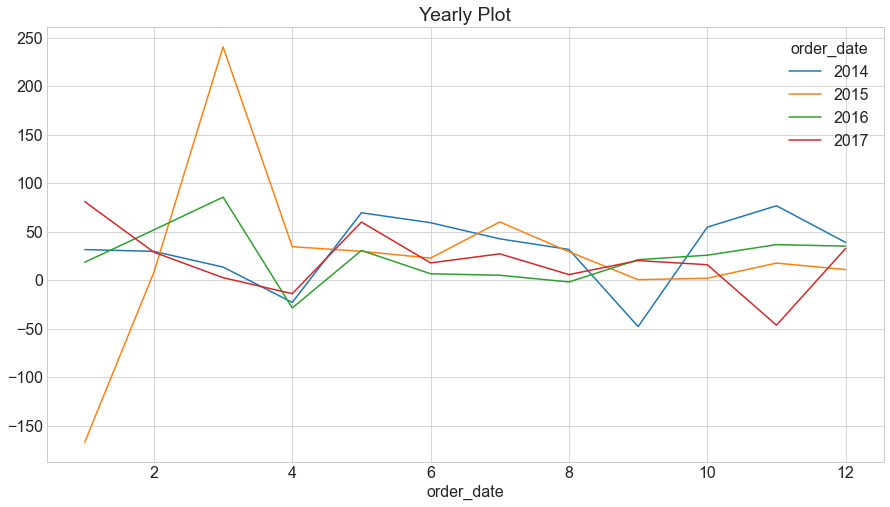

In [13]:
df.groupby([df.index.year, df.index.month])['profit'].mean().unstack(0).plot(title='Yearly Plot')

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

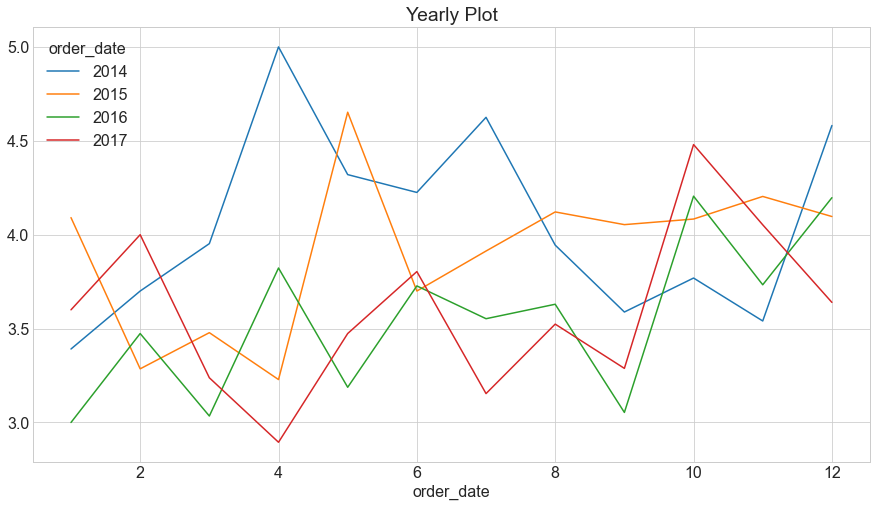

In [14]:
df.groupby([df.index.year, df.index.month])['quantity'].mean().unstack(0).plot(title='Yearly Plot')

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

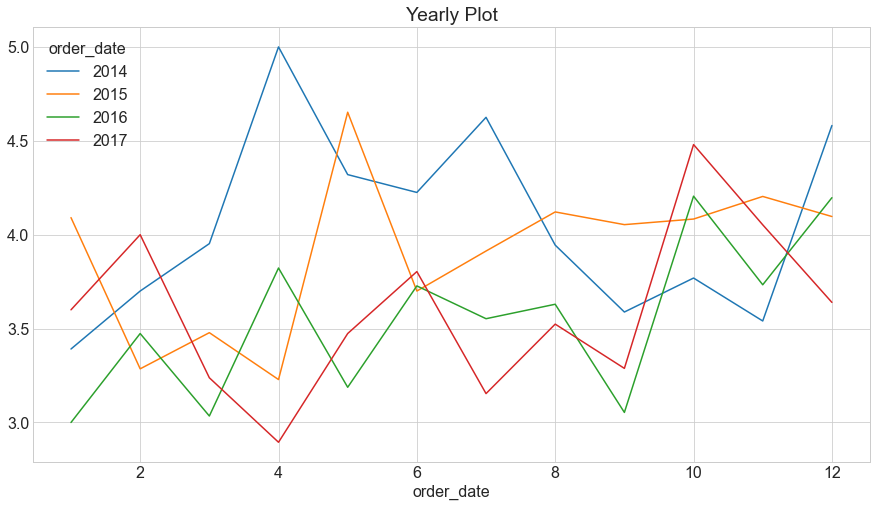

In [15]:
df.groupby([df.index.year, df.index.month])['quantity'].mean().unstack(0).plot(title='Yearly Plot')

# What item/ discount is responsible for the dip in profit for 2017?

<AxesSubplot:xlabel='order_date'>

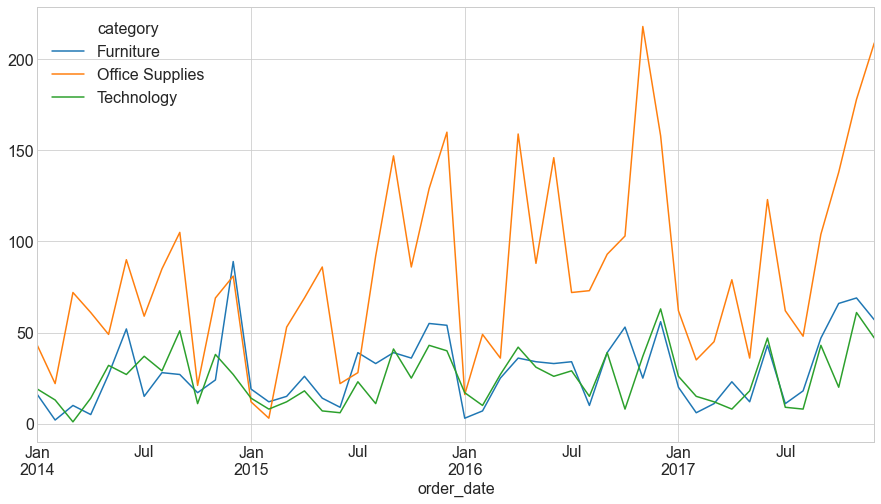

In [17]:
df.groupby('category').resample('m').quantity.sum().unstack(0).plot()

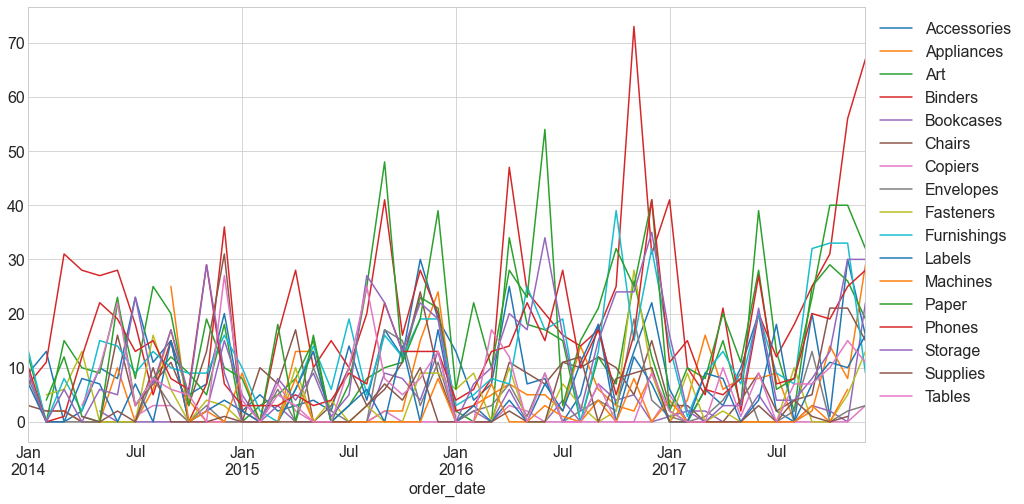

In [100]:
df.groupby('sub_category').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Sales, Profit, and Discounts for Sub-Categories

In [108]:
the_list = df[df['sub_category'] != 'Paper']
the_list = the_list[the_list['sub_category'] != 'Supplies']
the_list = the_list[the_list['sub_category'] != 'Bookcases']
the_list = the_list[the_list['sub_category'] != 'Fasteners']
the_list = the_list[the_list['sub_category'] != 'Tables']
the_list = the_list[the_list['sub_category'] != 'Labels']
the_list = the_list[the_list['sub_category'] != 'Art']
the_list = the_list[the_list['sub_category'] != 'Storage']
the_list = the_list[the_list['sub_category'] != 'Furnishings']

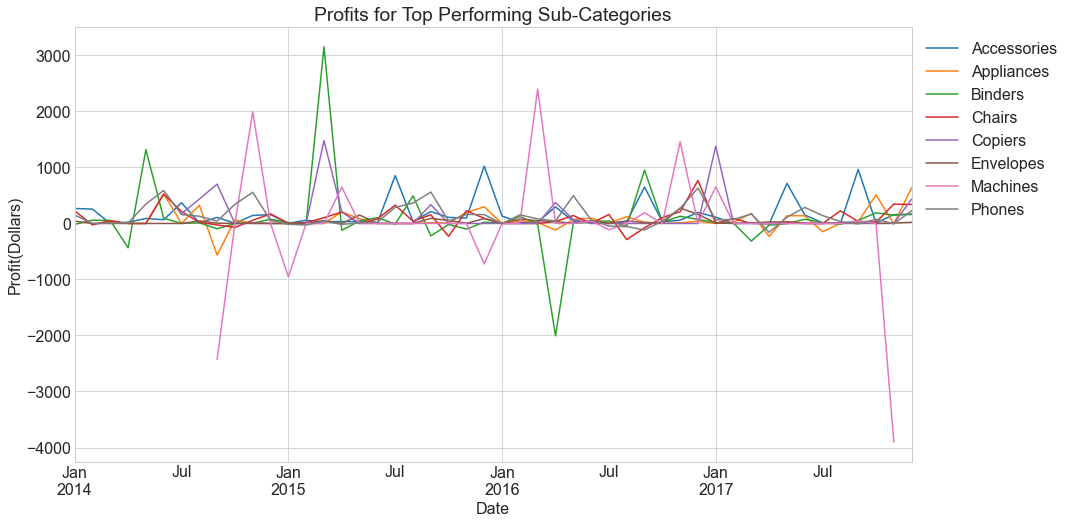

In [115]:
the_list.groupby('sub_category').resample('m').profit.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Profits for Top Performing Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Profit(Dollars)')
plt.show()

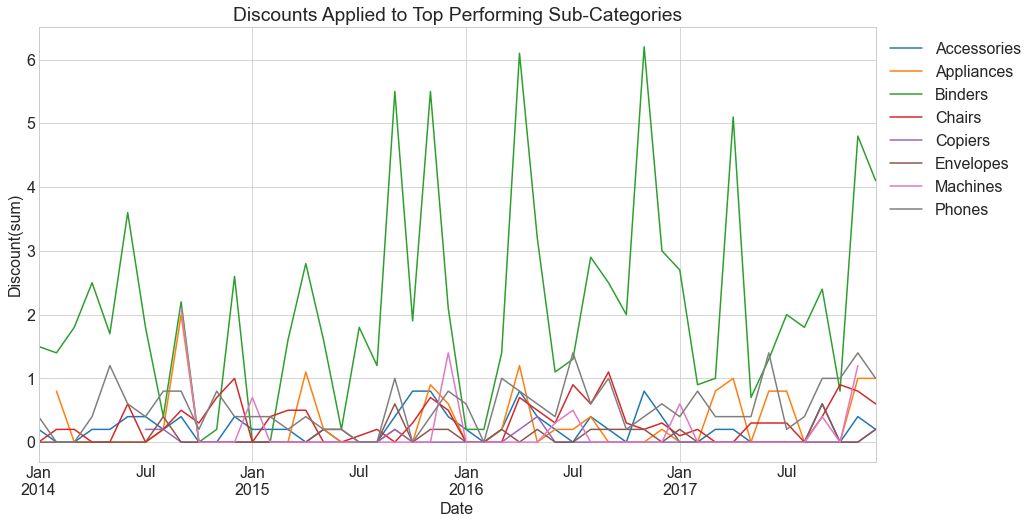

In [120]:
the_list.groupby('sub_category').resample('m').discount.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Discounts Applied to Top Performing Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Discount(sum)')
plt.show()

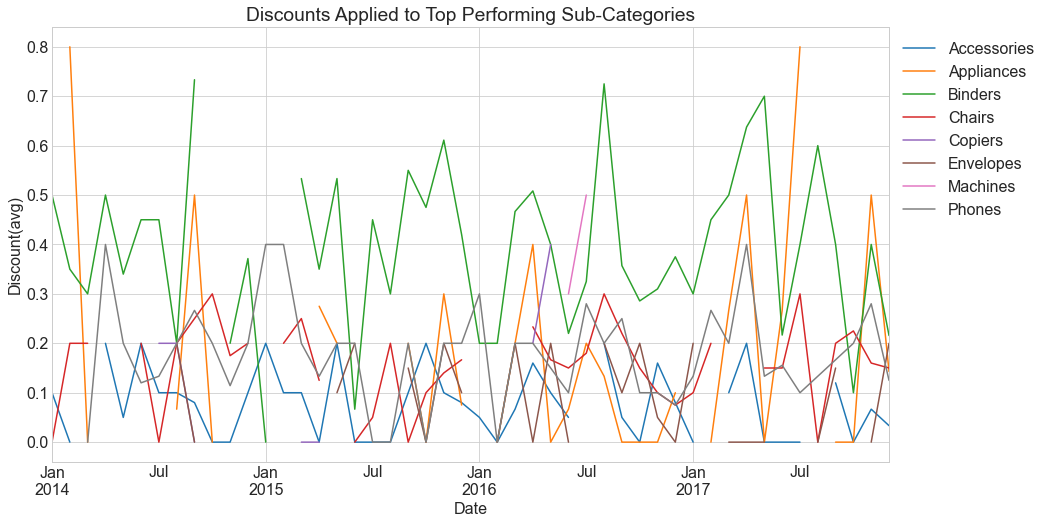

In [121]:
the_list.groupby('sub_category').resample('m').discount.mean().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Discounts Applied to Top Performing Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Discount(avg)')
plt.show()

In [124]:
the_list = the_list[the_list['sub_category'] != 'Envelopes']
the_list = the_list[the_list['sub_category'] != 'Chairs']
the_list = the_list[the_list['sub_category'] != 'Accessories']

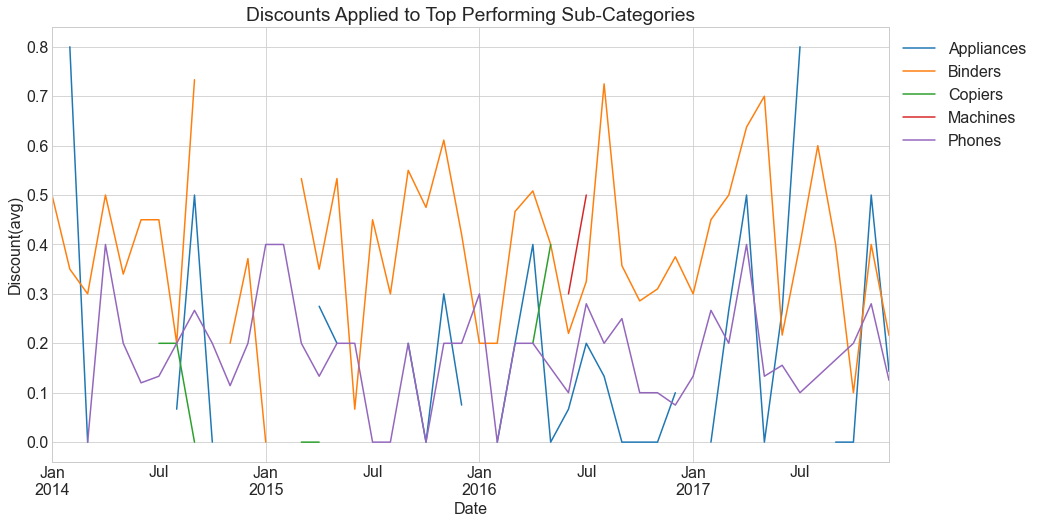

In [125]:
the_list.groupby('sub_category').resample('m').discount.mean().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Discounts Applied to Top Performing Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Discount(avg)')
plt.show()

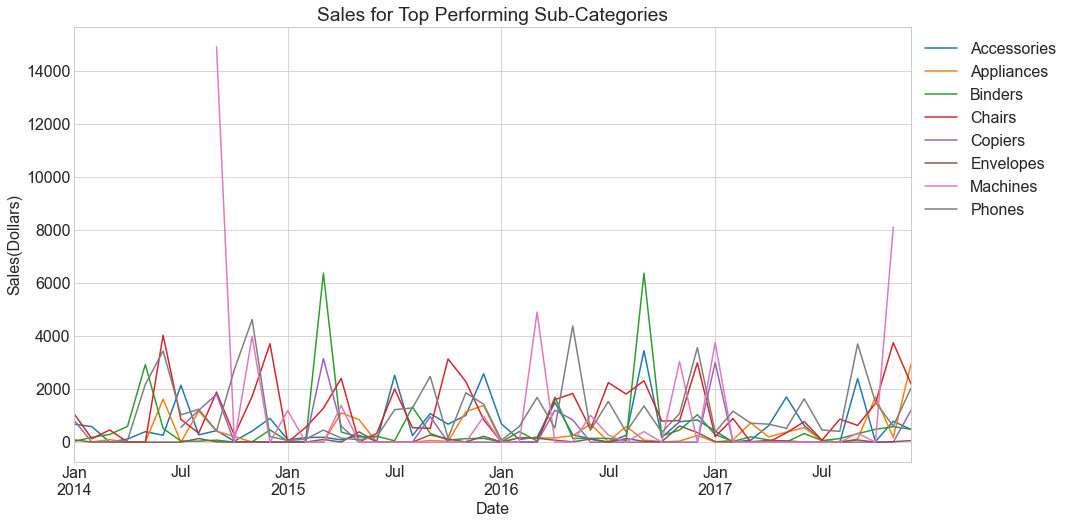

In [116]:
the_list.groupby('sub_category').resample('m').sales.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Sales for Top Performing Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Sales(Dollars)')
plt.show()

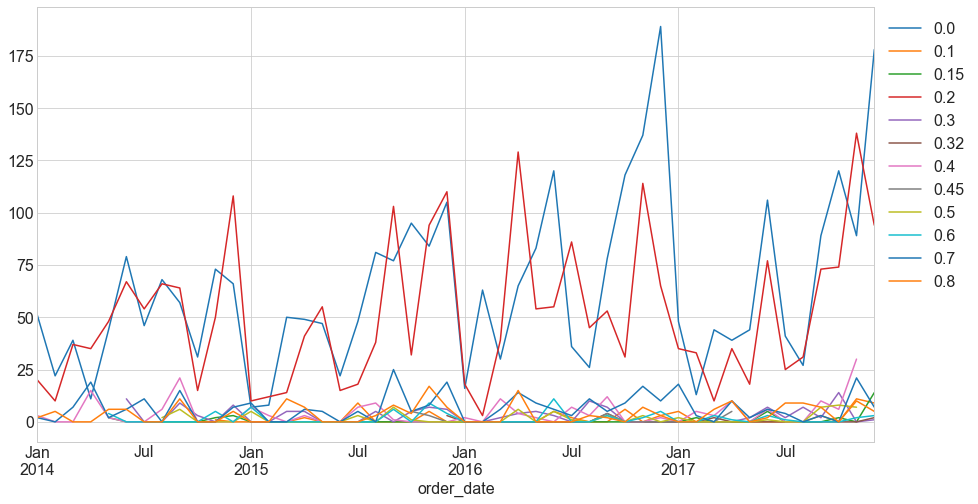

In [20]:
df.groupby('discount').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [44]:
# df.groupby('product name').resample('m').quantity.sum().unstack(0).plot()
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [42]:
df['discount_bin'] = pd.qcut(df.discount, 2, labels=['low', 'high'])
df.head()

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,sales,quantity,discount,profit,category_id,region_id,product name,category,sub_category,region_name,discount_bin
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,11.784,3.0,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central,low
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,3.540,2.0,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,high
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,272.736,3.0,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,low
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,TEC-AC-10001266,31.200,3.0,0.2,9.7500,12,3,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,low
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,OFF-AR-10004078,9.344,2.0,0.2,1.1680,7,3,Newell 312,Office Supplies,Art,Central,low


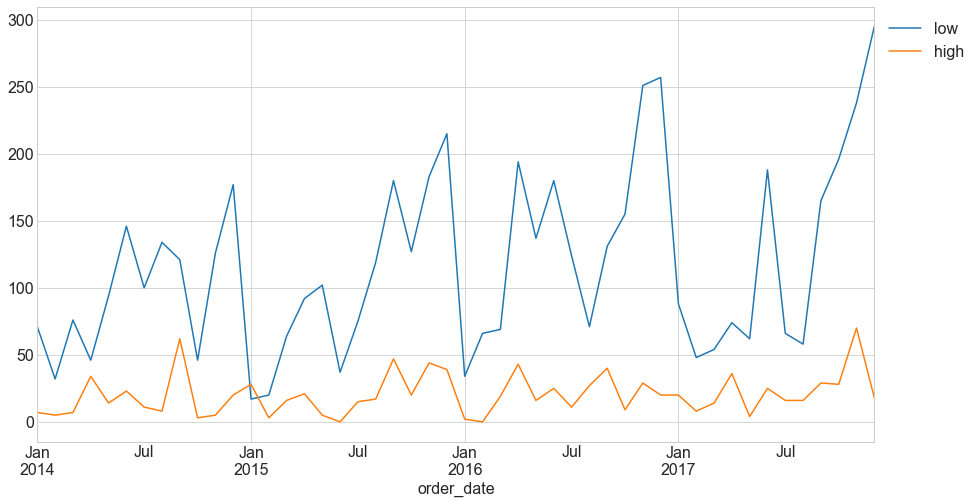

In [43]:
df.groupby('discount_bin').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='order_date'>

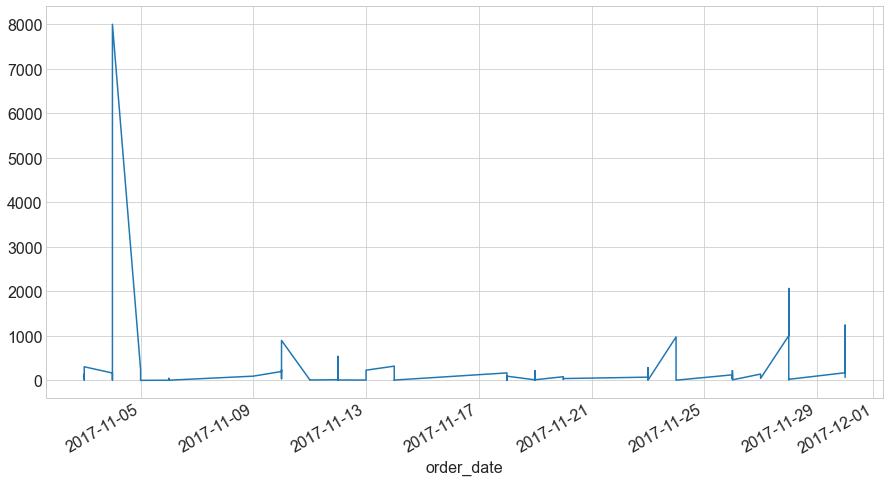

In [77]:
df.loc['2017-11'].sales.plot()


<AxesSubplot:xlabel='order_date'>

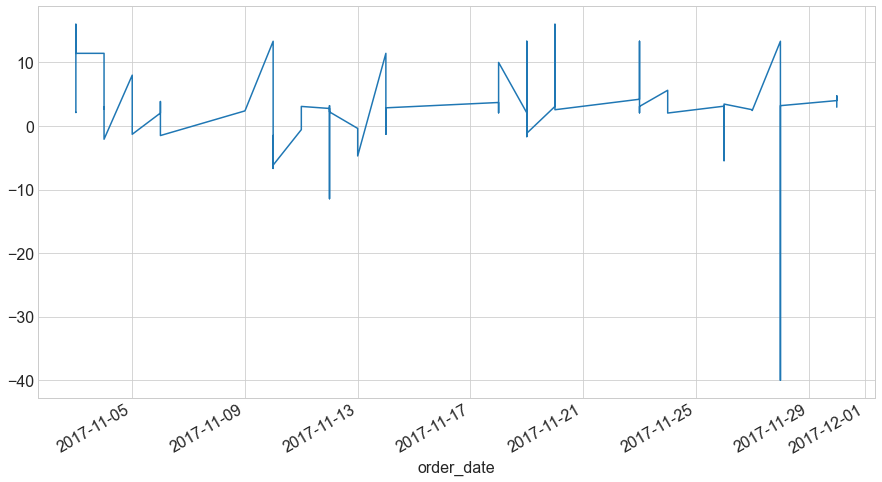

In [78]:
round((df.loc['2017-11'].sales / df.loc['2017-11'].profit), 2).plot()

In [81]:
# days in 2017 Q4
df.loc['2017-11-04']

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,sales,quantity,discount,profit,category_id,region_id,product name,category,sub_category,region_name,discount_bin
order_date,,,,,,,,,,,,,,,,,,,,,
2017-11-04,US-2017-168116,2017-11-04,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217.0,OFF-AP-10002457,167.440,2.0,0.2,14.6510,10,1,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,South,low
2017-11-04,CA-2017-105144,2017-11-11,Standard Class,SZ-20035,Home Office,United States,Grand Prairie,Texas,75051.0,OFF-LA-10003923,23.680,2.0,0.2,8.8800,3,3,Alphabetical Labels for Top Tab Filing,Office Supplies,Labels,Central,low
2017-11-04,US-2017-156083,2017-11-11,Standard Class,JL-15175,Home Office,United States,Columbia,Tennessee,38401.0,OFF-PA-10001560,9.664,2.0,0.2,3.2616,11,1,"Adams Telephone Message Books, 5 1/4” x 11”",Office Supplies,Paper,South,low
2017-11-04,US-2017-168116,2017-11-04,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217.0,TEC-MA-10004125,7999.980,4.0,0.5,-3839.9904,16,1,Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,South,high


In [82]:
df.loc['2017-11-28']

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,sales,quantity,discount,profit,category_id,region_id,product name,category,sub_category,region_name,discount_bin
order_date,,,,,,,,,,,,,,,,,,,,,
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-FU-10000576,1007.232,6.0,0.2,75.5424,6,4,Luxo Professional Fluorescent Magnifier Lamp with Clamp-Mount Base,Furniture,Furnishings,East,low
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-TA-10004154,2065.320,12.0,0.4,-619.5960,4,4,"Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer",Furniture,Tables,East,high
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-FU-10003601,516.488,7.0,0.2,-12.9122,6,4,"Deflect-o RollaMat Studded, Beveled Mat for Medium Pile Carpeting",Furniture,Furnishings,East,low
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,OFF-PA-10000788,15.552,3.0,0.2,5.4432,11,4,Xerox 210,Office Supplies,Paper,East,low
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,OFF-PA-10002479,25.344,6.0,0.2,7.9200,11,4,Xerox 4200 Series MultiUse Premium Copy Paper (20Lb. and 84 Bright),Office Supplies,Paper,East,low


<AxesSubplot:xlabel='shipping_method,order_date'>

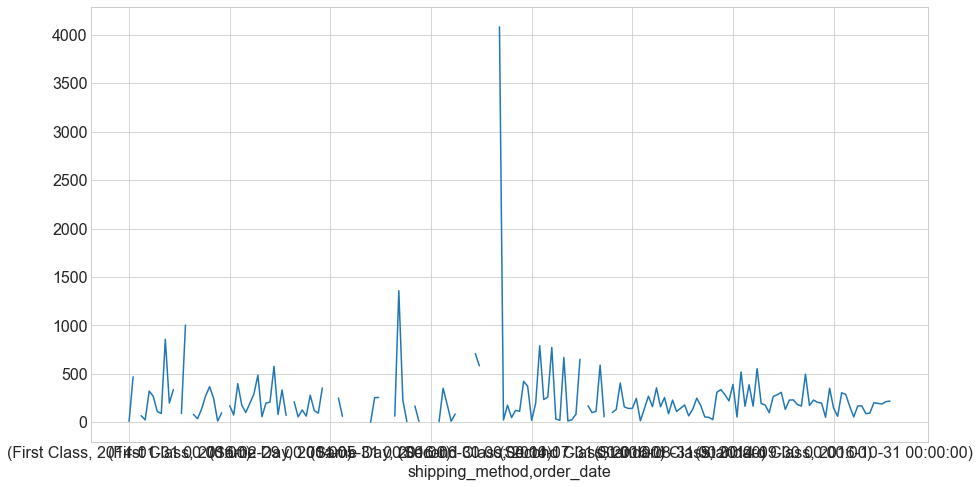

In [70]:
df.groupby('shipping_method').resample('m').sales.mean().plot()

<AxesSubplot:xlabel='shipping_method,order_date'>

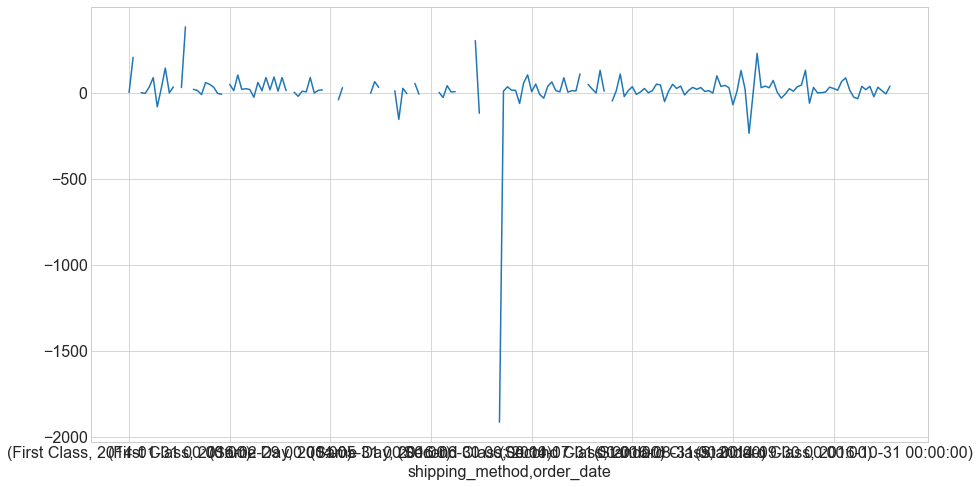

In [68]:
df.groupby('shipping_method').resample('m').profit.mean().plot()

In [112]:
(df.groupby('sub_category')['profit'].sum()) / (df.groupby('sub_category')['quantity'].sum())


sub_category
Accessories     16.357904
Appliances      10.096358
Art              2.416681
Binders          4.034400
Bookcases      -17.998235
Chairs          11.702038
Copiers        180.593271
Envelopes        8.014539
Fasteners        1.072871
Furnishings      3.448612
Labels           5.986535
Machines        -7.734911
Paper            6.639732
Phones          10.733219
Storage          4.745997
Supplies        -2.565635
Tables         -16.447292
dtype: float64

In [114]:
(df.groupby('category')['profit'].sum()) / (df.groupby('category')['quantity'].sum())


category
Furniture          -0.444857
Office Supplies     4.859695
Technology         15.976220
dtype: float64